In [1]:
# Grabbing the wikipedia table data and storing it in csv file named Manufacturing_Industries.

import requests
from bs4 import BeautifulSoup
import pandas as pd
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_manufacturing_companies_by_revenue')
soup = BeautifulSoup(wiki_page.text,'html.parser')
tables = soup.find('table',{'class':'wikitable sortable plainrowheads'}).tbody
rows = tables.find_all('tr')
columns = [v.text.replace('\n', '') for v in rows[0].find_all('th')]
df = pd.DataFrame(columns=columns)
for i in range(1,len(rows)):
    tds = rows[i].find_all('td')
    
    if len(tds) == 4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n','').replace('\xa0','')]
    else:
        values = [td.text.replace('\n','').replace('\xa0','') for td in tds]
    df = df.append(pd.Series(values, index = columns), ignore_index = True)
    df.to_csv(r'C:\Users\s534627\Desktop\Project' + '\\Manufacturing_Industries.csv', index =False )

In [2]:
# Grouping the Top 5 Industries interms of Revenue and storing it in csv file named Top5.csv.

import pandas as pd
industries = pd.read_csv('Manufacturing_Industries.csv')
from pandas import DataFrame
aggregate = industries.groupby('Industry').Revenue.sum()
top_5 = aggregate[0:5]
df = DataFrame(top_5,columns= ['Industry','Revenue'])
export_excel = df.to_csv(r'C:\Users\s534627\Desktop\Project\Top5.csv', index = None, header=True)

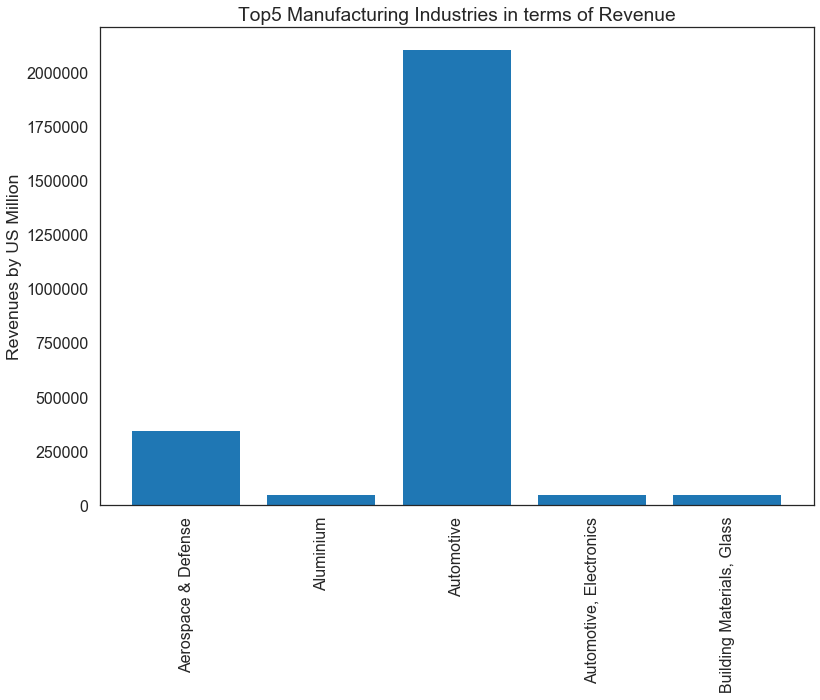

In [6]:
# Plotting the results of Top5 Manufacturing Industries in a Bargraph using Matplotlib & Seaborn.

import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
plot = pd.read_csv(r'C:\Users\s534627\Desktop\Project\Top5.csv')
style.use('seaborn-white')
x_axis=plot.Industry
y_axis=np.arange(len(x_axis))
plt.bar(y_axis,plot.Revenue[0:5],align='center',alpha=1.0)
plt.xticks(y_axis, x_axis)
plt.title('Top5 Manufacturing Industries in terms of Revenue')
plt.xticks(rotation=90)
plt.ylabel('Revenues by US Million')
plt.show()